# Part 1 ‑ Exploratory data analysis

The attached logins.json file contains (simulated) timestamps of user logins in a particular
geographic location. Aggregate these login counts based on 15minute
time intervals, and
visualize and describe the resulting time series of login counts in ways that best characterize the
underlying patterns of the demand. Please report/illustrate important features of the demand,
such as daily cycles. If there are data quality issues, please report them.

# 1. Import toolbox and file

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import timedelta
import plotly.express as px

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import warnings
warnings.simplefilter(action='ignore', category=RuntimeWarning)

sns.set()

In [2]:
login = pd.read_json("logins.json")


In [3]:
login.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93142 entries, 0 to 93141
Data columns (total 1 columns):
login_time    93142 non-null datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 727.8 KB


# 2. Add a column to count login times, and turn the login time into index.

Realized one thing, for all these timeindex resample or frequency to work, have to actually put the time as the data index. Or, need to create a new column to transform the time index. For resample by frequency, can try groupby(pd.Grouper(level='index', freq='15m'))-> though .count( ).to_frame( ) will have problem.

In [4]:
# put login times into df along with count 1 for each login
# login times are datetime objects
login = pd.DataFrame({'login_time':pd.to_datetime(login.login_time), 'login_count':1})
login.head()

,login_time,login_count
0,1970-01-01 20:13:18,1
1,1970-01-01 20:16:10,1
2,1970-01-01 20:16:37,1
3,1970-01-01 20:16:36,1
4,1970-01-01 20:26:21,1


In [5]:
# sort by login time and 
login = login.sort_values(by='login_time').set_index('login_time')

In [6]:
# resample every 15 minutes and count logins for each 15 min period
login_15 = login.resample('15T').sum()
login_15.head()

,login_count
login_time,
1970-01-01 20:00:00,2
1970-01-01 20:15:00,6
1970-01-01 20:30:00,9
1970-01-01 20:45:00,7
1970-01-01 21:00:00,1


In [27]:
login_15.describe()

,login_count
count,9788.000000
mean,9.515938
std,8.328818
min,0.000000
25%,3.000000
50%,7.000000
75%,13.000000
max,73.000000


# 3. Plot & analysis

## 3.1 First plot out counts for entire time frame
From the plot we can see there are some periodic spike, there seems to be exist a cycle for daily login amount.

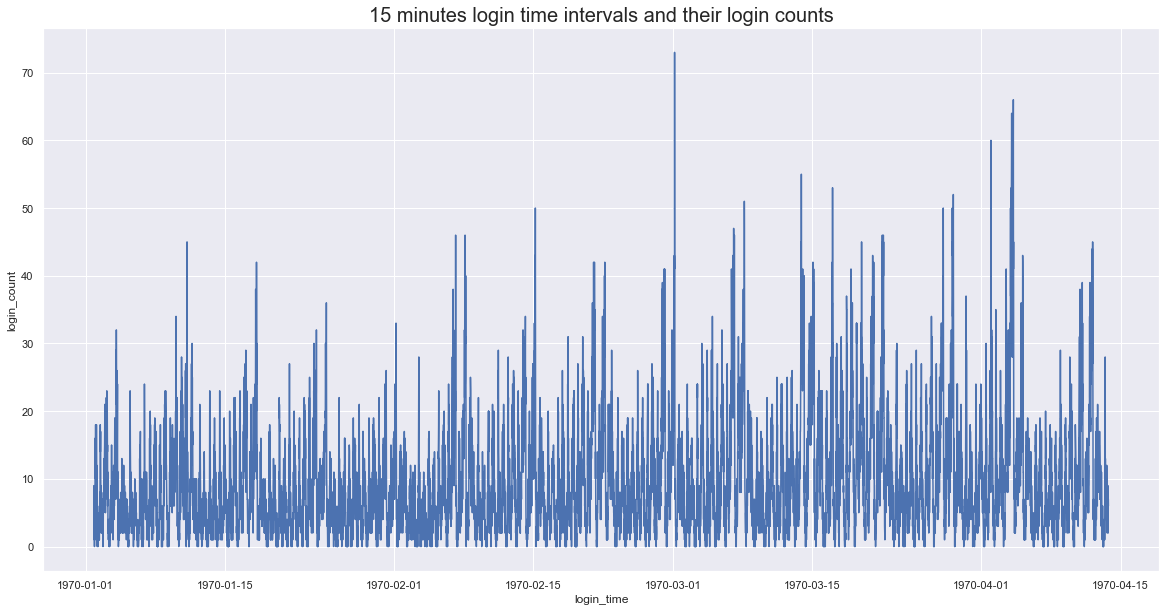

In [7]:
fig = plt.gcf();
fig.set_size_inches(20, 10);

sns.lineplot(login_15.index, login_15.login_count); 
plt.title("15 minutes login time intervals and their login counts", size=20);

## 3.2 Login count plot for the first day
From the plot we can see that peak login time for 1970-01-01 is around 00-03, 11-13

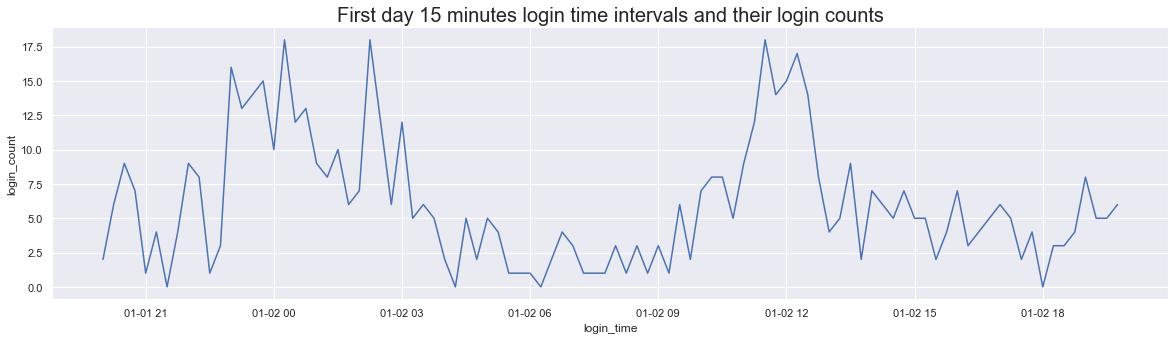

In [12]:
fig = plt.gcf();
fig.set_size_inches(20, 5);

sns.lineplot(login_15.index[:96], login_15.login_count[:96]); 
plt.title("First day 15 minutes login time intervals and their login counts", size=20);

## 3.3 Login count plot for the first week
From the plot of the first week, we can see that high volume of login ususally happend around midnight and noon in a day.

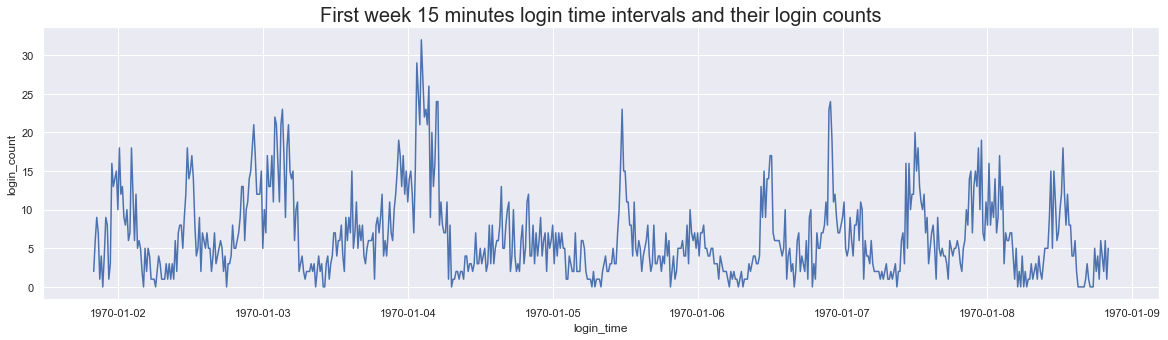

In [19]:
fig = plt.gcf();
fig.set_size_inches(20, 5);
sns.lineplot(login_15.index[:673], login_15.login_count[:673]); 
plt.title("First week 15 minutes login time intervals and their login counts", size=20);

## 3.4 Login count plot for the first 4 weeks (month)
It is clear from the plot below that the highest volumne of login happened on the same day of the week for the first month, by reserach on the internet, it happened to be Sunday midnight when all these weekly peaks occur. From the plots below, we can see that from Monday to Thursday, the midnight and noon login peak is lower compare to login peak from Friday to Sunday.

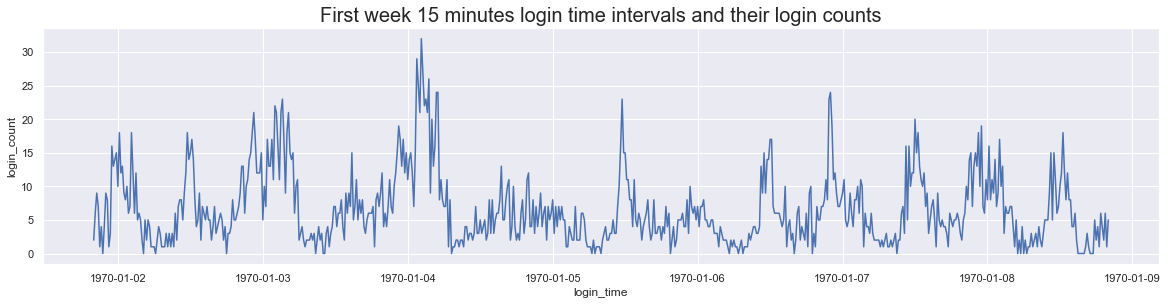

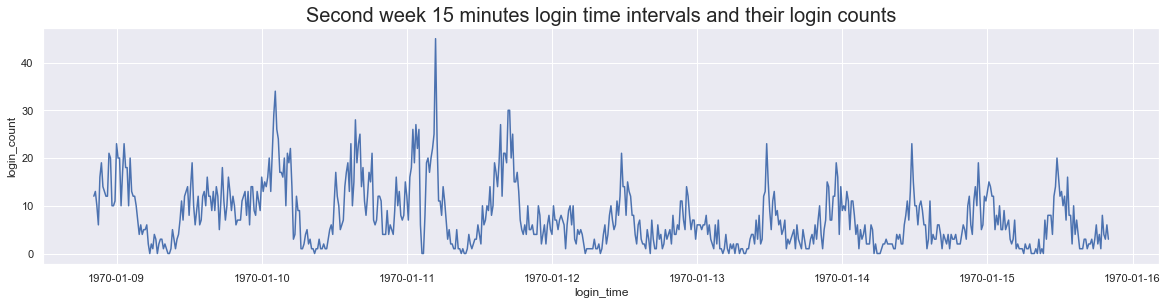

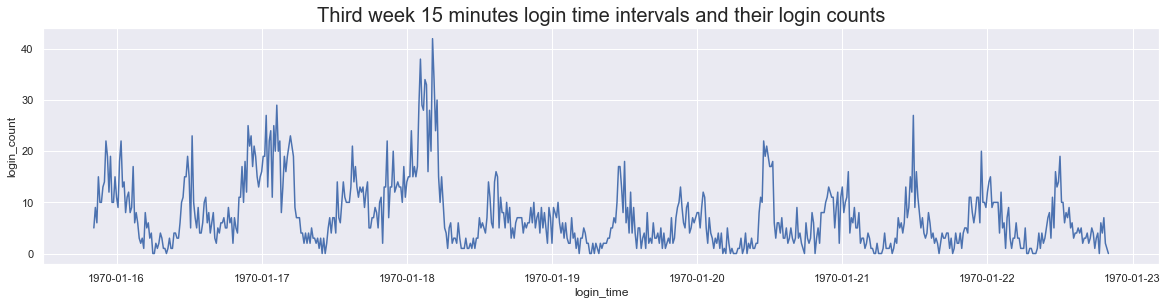

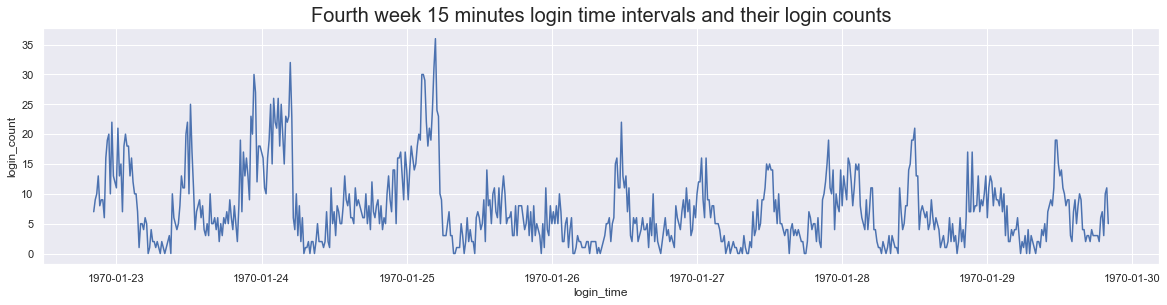

In [18]:
plt.subplot(4, 1, 1)
fig = plt.gcf();
fig.set_size_inches(20, 20);
sns.lineplot(login_15.index[:673], login_15.login_count[:673]); 
plt.title("First week 15 minutes login time intervals and their login counts", size=20);
plt.show()

plt.subplot(4, 1, 2)
fig = plt.gcf();
fig.set_size_inches(20, 20);
sns.lineplot(login_15.index[673:1345], login_15.login_count[673:1345]); 
plt.title("Second week 15 minutes login time intervals and their login counts", size=20);
plt.show()

plt.subplot(4, 1, 3)
fig = plt.gcf();
fig.set_size_inches(20, 20);
sns.lineplot(login_15.index[1345:2017], login_15.login_count[1345:2017]); 
plt.title("Third week 15 minutes login time intervals and their login counts", size=20);
plt.show()

plt.subplot(4, 1, 4)
fig = plt.gcf();
fig.set_size_inches(20, 20);
sns.lineplot(login_15.index[2017:2689], login_15.login_count[2017:2689]); 
plt.title("Fourth week 15 minutes login time intervals and their login counts", size=20);
plt.show()